# Image Interpretation – Assignment 5

This assignment on __Deep Convolutional Neural Networks__ covers the deep networks labs from 8th and 15th of November, and is graded by a maximum of 9 points.

In order to submit the results, send a ZIP file with your implemented code (functions prefixed with ii and any “helper” functions you wrote) to <riccardo.delutio@geod.baug.ethz.ch> with subject [Image Interpretation 2018 Assignment 5] no later than on the 21st of November, 2018.

In addition to the code, include a report (__max. 8 pages__ PDF) explaining the structure of the code and the python/Matlab functions used. This includes the reasons for choosing particular functions as well as a short justification of their parameter setting. For the more complicated tasks, the choice of the underlying
data structures and algorithms should be explained too. We encourage you to add also diagrams, illustrations, and figures into the report when appropriate, but it is not necessary to copy the related theory from the lecture slides. The report should not contain any code snippets (but the code should contain comments if appropriate). 

__Team work is not allowed__. Everybody implements his/her own code and writes his/her own report. Discussing issues with others is fine, sharing code and/or report with others is __not__. If you use any code fragments found on the Internet, make sure you reference them properly.

# Exercise 1, 2pts

In this first exercise we are going to get an idea on how simple neural networks
behave for simple classification tasks. We’ll make use of two different javascript
based neural network to train and modify an existing model. Let’s start with a very
simple one, a simple neural network with only fully connected layers and without
convolutions. Open a web browser on the page http://playground.tensorflow.org/ and start playing with the interface. For each dataset set the noise level to 30. Click play on the top-left to start training. To assess the quality of the network look at the values train and test loss at the top right. Tip: Sometimes it’s easier
to see the result if you discretise the graph.

1. For each dataset (the four boxes under DATA) explore the best features that
make the network converge faster.
2. For the spiral dataset and default network how does the batch size (bottom
left slider) influence the results? How does it relate with the learning rate
(central top)?
3. Try all the different activation layers (top slider), what are their differences?
Why?
4. How does the number of hidden layers and the number of neuron per
	layer affect the results in terms of quality (test loss) and convergence
	speed?
5. Compare the performance (convergence rate and accuracy) of a network for regression and classification? Explain the differences.
6. Play with different types and rates of regularization (top slider) and explain the changes you observe and the influence on the results.

Explain each question and motivate it with a screenshot of the experiment.

__The following part is optional, but fun!__ Open this page https://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html and try to tweak all the pa-
rameters you can to obtain the best network (the highest validation accuracy).
Scroll down the page and peek inside the network and have a look at different
activation and weight as the network gets trained (click pause to make it freeze).
Check how the prediction works on the test set in the last part of the page.

# Exercise 2, 3pts

In this exercise you have to train a new Convolutional Neural Network from scratch for the classification of images.
1. For this we will use the [Keras](https://keras.io/) library. You can download it on your `conda` environment with `conda install keras-gpu`.
2. The aim is to achieve 99% accuracy (on validation/test set) the MNIST dataset http://yann.lecun.com/exdb/mnist/. We have provided a basic Keras implementation of a CNN.
3. You are allowed to do whatever you want (except copy pasting) with the
network as long as it is explained in your report. Feel free to change the architecture
of the network as well as parameters (e.g. learning rate, kernel sizes, ...). You
can try to guess parameters manually of you want, just make sure that it
performs better than 99% on the validation set.
4. Sketch the final network architecture in your report.
5. Make sure you train the network on the GPU, otherwise it will be too slow.
6. Explain the plots that appear.


Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)
60000 train samples
10000 test samples


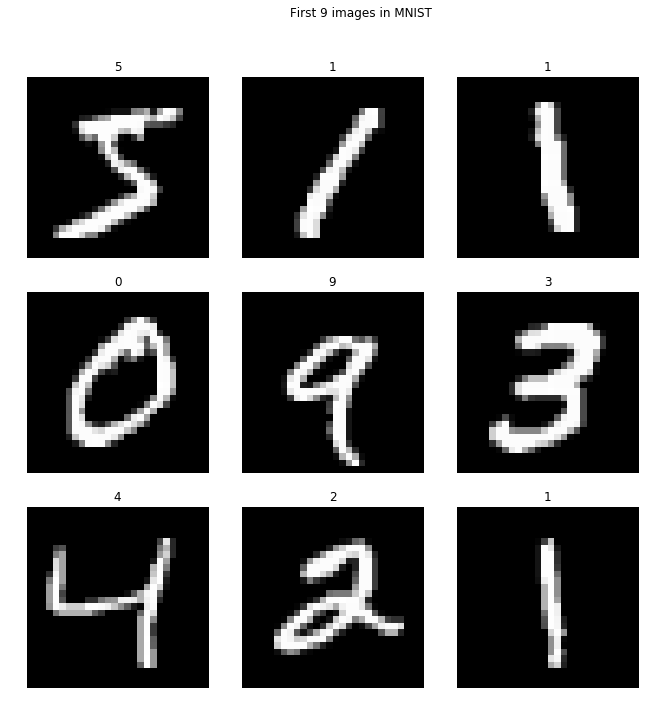

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 100
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# plot the first 9 training images in MNIST
fig, ax = plt.subplots(3, 3, figsize = (10, 10))
fig.suptitle('First 9 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(3) for j in range(3)]:
    ax[x, y].axis('off')
    ax[x, y].imshow(x_train[x + y * 3,:,:,:].reshape((28,28)), cmap = 'gray')
    ax[x, y].set_title(np.where(y_train[x + y * 3])[0][0])
plt.show()

In [2]:
# The model
model = Sequential()

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.2074 - acc: 0.9365 - val_loss: 0.0580 - val_acc: 0.9817
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0641 - acc: 0.9804 - val_loss: 0.0406 - val_acc: 0.9867
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0490 - acc: 0.9854 - val_loss: 0.0323 - val_acc: 0.9896 - ETA
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0410 - acc: 0.9874 - val_loss: 0.0296 - val_acc: 0.9900A: 1s - loss: 0.0411 - acc: 0.987 - ETA: 1s - loss: 0.0409 - acc: 0.987 - ETA: 1s - loss: 0.0414 - acc: - ETA: 1s - loss: 0.0405 - acc: 0 - ETA: 0s - loss: 0.0409
Epoch 5/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0350 - acc: 0.9893 - val_loss: 0.0302 - val_acc: 0.9900A: 3s -  - ETA: 2s - loss: 0.0348 - acc: - ETA: 1s - loss: 0.0349 - acc - ETA: 1s - loss:
Epoch 6

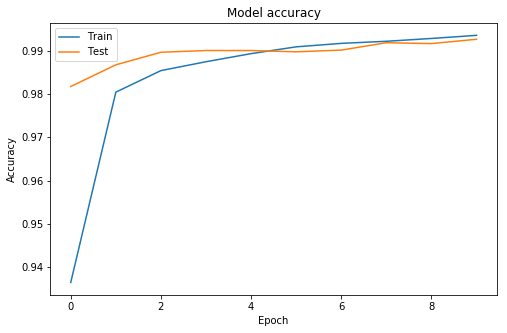

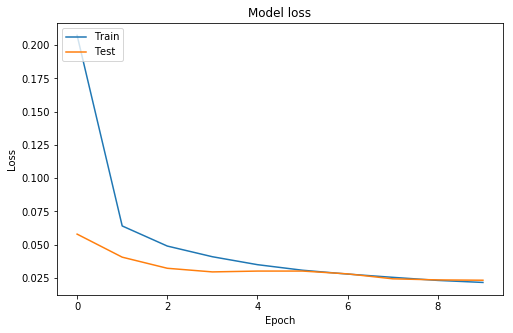

In [3]:
# Plot training & validation accuracy
figsize = (8,5)
plt.figure(figsize=figsize)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=figsize)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Exercise 3, 4pts

There is a competition https://www.kaggle.com/c/dogs-vs-cats-iminit-2018. You should
have at least 75% accuracy on the public leaderboard to get basic points on this
exercise. The first 3 places will have extra points (5 for the first place, and 4 for
the second and the third place). Use all your knowledge and experience to attack
the problem.

In [5]:
from skimage import io
import cv2
import matplotlib.pyplot as plt
import numpy as np

cat_data_path_str = 'H:/Downloads/New folder/cats_vs_dogs/cat.*.jpg'
Catimages = io.ImageCollection(cat_data_path_str)
print(len(Catimages))

dog_data_path_str = 'H:/Downloads/New folder/cats_vs_dogs/dog.*.jpg'
Dogimages = io.ImageCollection(dog_data_path_str)
print(len(Dogimages))

CatCollection = []
DogCollection = []


for i in range(len(Catimages)):
    tempCat = cv2.resize(Catimages[i],(224,224))
    CatCollection.append(tempCat)
    
for i in range(len(Dogimages)):
    tempDog = cv2.resize(Dogimages[i],(224,224))
    DogCollection.append(tempDog)

Dog = np.array(DogCollection)
Dog_y = np.ones(Dog.shape[0])

Cat = np.array(CatCollection)
Cat_y = np.zeros(Cat.shape[0])


x = np.concatenate((Dog, Cat),axis = 0)
y = np.concatenate((Dog_y, Cat_y),axis = 0)

print(x.shape, y.shape)

9376
9376
(18752, 224, 224, 3) (18752,)


0.0 1.0 0.0 1.0
x_train shape: (11251, 224, 224, 3)
x_test shape: (7501, 224, 224, 3)
y_train shape: (11251,)
y_test shape: (7501,)
11251 train samples
7501 test samples


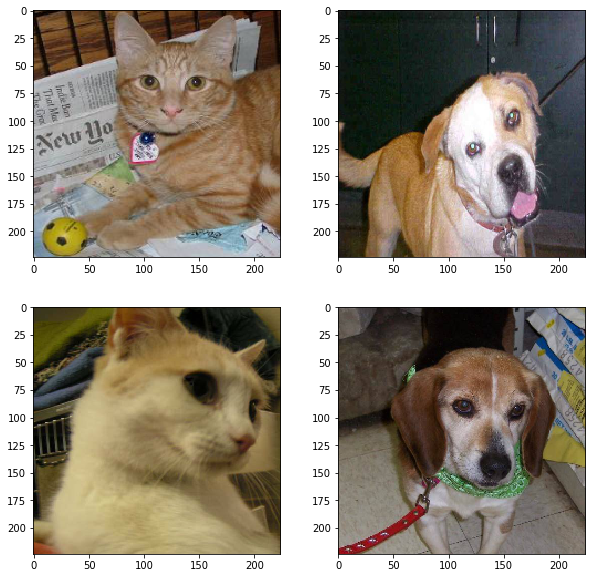

In [6]:
import keras

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# X_train= keras.utils.normalize(X_train, axis=-1)
# X_test= keras.utils.normalize(X_test, axis=-1)


fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax[0,0].imshow(X_train[0])
ax[0,1].imshow(X_train[10])
ax[1,0].imshow(X_train[100])
ax[1,1].imshow(X_train[20])
print(y_train[0],y_train[10],y_train[100],y_train[20])

print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


# X_train_reshaped = X_train.reshape(X_train.size)
# X_test_reshaped = X_test.reshape(X_test.size)

In [ ]:
# original model 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers


input_shape = (96, 96, 3)
batch_size = 96
num_classes = 1
epochs = 15

# The model
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(num_classes, activation='sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

# Evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [20]:
# model with pre trained structure
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import backend as K
from keras import regularizers

input_shape = (224, 224, 3)
batch_size = 16
num_classes = 1
epochs = 2

resnet50 = keras.applications.resnet50.ResNet50(include_top=False, pooling='avg', weights = 'imagenet',input_shape = input_shape)
for layer in resnet50.layers:
    layer.trainable = False

last = resnet50.output

# x = Flatten()(last)
# x = Dropout(0.25)(last)
# x = Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001))(last)
x = Dropout(0.25)(x)
x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs = resnet50.input, outputs = x)

model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

# Evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 11251 samples, validate on 7501 samples
Epoch 1/2
11251/11251 [==============================] - 251s 22ms/step - loss: 0.8522 - acc: 0.9301 - val_loss: 0.3433 - val_acc: 0.9628
Epoch 2/2
11251/11251 [==============================] - 241s 21ms/step - loss: 0.2541 - acc: 0.9525 - val_loss: 0.1515 - val_acc: 0.9767
Test loss: 0.1514919833642072
Test accuracy: 0.9766697773789107


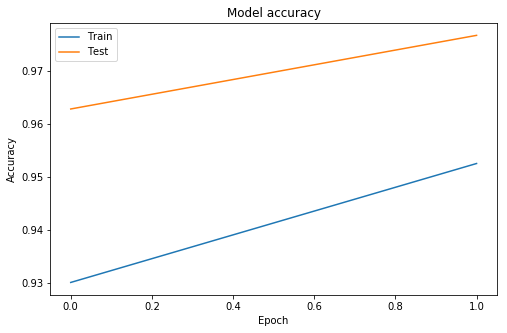

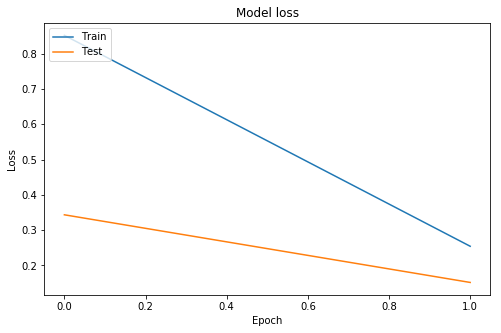

In [21]:
# Plot training & validation accuracy
figsize = (8,5)
plt.figure(figsize=figsize)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=figsize)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
test_data_path_str = 'H:/Downloads/New folder/test/*.jpg'
Testimages = io.ImageCollection(test_data_path_str)
print(len(Testimages))

TestCollection = []
idCollection = []

for i in range(len(Testimages)):
    tempTest = cv2.resize(Testimages[i],(224,224))
    TestCollection.append(tempTest)
    
    tempid = Testimages.files[i].split('\\')[1].split('.')[0]
    idCollection.append(tempid)

Test = np.array(TestCollection)
Ids = np.array(idCollection)

print(Test.shape)
print(Ids.shape)

6248
(6248, 224, 224, 3)
(6248,)


In [23]:
y_predicted = model.predict(Test)
y_predicted[y_predicted>0.5] = 1
y_predicted[y_predicted<=0.5] = 0

y_predicted = y_predicted.reshape(y_predicted.shape[0])
print(y_predicted.shape)
print(y_predicted)

(6248,)
[1. 0. 0. ... 1. 0. 1.]


In [25]:
import pandas as pd

dataframe = pd.DataFrame({'id':Ids, 'LABEL':y_predicted})
dataframe.to_csv('H:/Downloads/New folder/results.csv',index=False,sep=',')